In [1]:
import pandas as pd
import os
import requests as r

In [2]:
path = "/home/robbe/ionbot/ionbot_0.9.5/PXD016278/ionbot_files"
subdirs = [dirname for dirname in os.listdir(path)]

In [3]:
Dioxidated_proteins = set()
DioxidatedW_proteins = set()
Dioxidated_proteins_controls = set()
DioxidatedW_proteins_controls = set()
for subdir in subdirs:
    if "_AD2_" in subdir:
        with open(path + "/" + subdir + "/ionbot.modifications.csv") as fn:
            for line in fn.readlines():
                linelist = line.split(",")
                unexpected_modification = linelist[2]
                protein = linelist[1]
                if "Dioxidation" in unexpected_modification and not "sp" in protein:
                    Dioxidated_proteins.add(protein)
                if "Dioxidation[W]" in unexpected_modification and not "sp" in protein:
                    DioxidatedW_proteins.add(protein)
    if "_ctrl2_" in subdir:
        with open(path + "/" + subdir + "/ionbot.modifications.csv") as fn:
            for line in fn.readlines():
                linelist = line.split(",")
                unexpected_modification = linelist[2]
                protein = linelist[1]
                if "Dioxidation" in unexpected_modification and not "sp" in protein:
                    Dioxidated_proteins_controls.add(protein)
                if "Dioxidation[W]" in unexpected_modification and not "sp" in protein:
                    DioxidatedW_proteins_controls.add(protein)

Dioxidated_proteins_controlled = Dioxidated_proteins - Dioxidated_proteins_controls
DioxidatedW_proteins_controlled = DioxidatedW_proteins - DioxidatedW_proteins_controls

See file for functional_enrichment for dioxidation[W] proteins

In [4]:
Dioxidated_proteins = {}
DioxidatedW_proteins = {}
Dioxidated_proteins_controls = {}
DioxidatedW_proteins_controls = {}
for subdir in subdirs:
    if "_AD2_" in subdir:
        with open(path + "/" + subdir + "/ionbot.modifications.csv") as fn:
            for line in fn.readlines():
                linelist = line.split(",")
                unexpected_modification = linelist[2]
                protein = linelist[1]
                position = linelist[3]
                if "Dioxidation" in unexpected_modification and not "sp" in protein:
                    Dioxidated_proteins[protein] = position
                if "Dioxidation[W]" in unexpected_modification and not "sp" in protein:
                    DioxidatedW_proteins[protein] = position
    if "_ctrl2_" in subdir:
        with open(path + "/" + subdir + "/ionbot.modifications.csv") as fn:
            for line in fn.readlines():
                linelist = line.split(",")
                unexpected_modification = linelist[2]
                protein = linelist[1]
                position = linelist[3]
                if "Dioxidation" in unexpected_modification and not "sp" in protein:
                    Dioxidated_proteins_controls[protein] = position
                if "Dioxidation[W]" in unexpected_modification and not "sp" in protein:
                    DioxidatedW_proteins_controls[protein] = position

Dioxidated_proteins_set = {}
DioxidatedW_proteins_set = {}
Dioxidated_proteins_controls_set = {}
DioxidatedW_proteins_controls_set = {}
Dioxidated_proteins_controlled_set = {}
DioxidatedW_proteins_controlled_set = {}

for key,value in Dioxidated_proteins.items():
    if value not in Dioxidated_proteins_set.values():
        Dioxidated_proteins_set[key] = value

for key,value in DioxidatedW_proteins.items():
    if value not in DioxidatedW_proteins_set.values():
        DioxidatedW_proteins_set[key] = value       

for key,value in Dioxidated_proteins_controls.items():
    if value not in Dioxidated_proteins_controls_set.values():
        Dioxidated_proteins_controls_set[key] = value    

for key,value in DioxidatedW_proteins_controls.items():
    if value not in DioxidatedW_proteins_controls_set.values():
        DioxidatedW_proteins_controls_set[key] = value  

for key,value in Dioxidated_proteins.items():
    if value not in Dioxidated_proteins_controls_set.values():
        Dioxidated_proteins_controlled_set[key] = value

for key,value in DioxidatedW_proteins.items():
    if value not in DioxidatedW_proteins_controls_set.values():
        DioxidatedW_proteins_controlled_set[key] = value

In [5]:
with open("Dioxidated_proteins.txt", "w") as fn:
    fn.write("Protein\tCenterPosition\n")
    for key, value in Dioxidated_proteins_controlled_set.items():
        fn.write("{}\t{}\n".format(key, value))

    fn.close()

In [6]:
with open("DioxidatedW_proteins.txt", "w") as fn:
    fn.write("Protein\tCenterPosition\n")
    for key, value in DioxidatedW_proteins_controlled_set.items():
        fn.write("{}\t{}\n".format(key, value))

    fn.close()

In [7]:
Kynureninprots = {}
for subdir in subdirs:
    if "_AD2_" in subdir:
        with open(path + "/" + subdir + "/ionbot.modifications.csv") as fn:
            for line in fn.readlines():
                linelist = line.split(",")
                unexpected_modification = linelist[2]
                protein = linelist[1]
                position = linelist[3]
                if "Trp->Kynurenin[W]" in unexpected_modification and not "sp" in protein:
                    Kynureninprots[protein] = position

Kynureninprots_set = {}
for key,value in Kynureninprots.items():
    if value not in Kynureninprots_set.values():
        Kynureninprots_set[key] = value

with open("Kynureninprots_proteins.txt", "w") as fn:
    fn.write("Protein\tCenterPosition\n")
    for key, value in Kynureninprots_set.items():
        fn.write("{}\t{}\n".format(key, value))

    fn.close()

In [8]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD016278/flashlfq/QuantifiedPeptides.tsv", sep="\t")

In [9]:
quant["Modifications"] = quant["Sequence"].str.split("|").str[1]

In [10]:
quant = quant[~quant["Modifications"].isna()]
kynurenin = quant[quant["Modifications"].str.contains("Trp->Kynurenin")]

In [11]:
kynurenin.shape[0]

1291

1291 quantified peptides modified with kynurenin

In [12]:
kynureninP = kynurenin[kynurenin["Base Sequence"].str.contains("P")]

In [13]:
kynureninP.shape[0]

628

In [14]:
628/1291

0.48644461657629745

Half of the peptides that are modified with kynurenin contained a proline

In [15]:
kynureninP[["Base Sequence", "Protein Groups"]]

,Base Sequence,Protein Groups
172,AADDTWEPFASGK,TTHY_HUMAN
246,AADDTWEPFASGKTSESGELHGLTTEEEFVEGIYK,TTHY_HUMAN
253,AADDTWEPFASGKTSESGELHGLTTEEEFVEGIYKVEIDTK,TTHY_HUMAN
611,AAGVPSATITWR,PGBM_HUMAN
664,AALAPYNWPVWLGVHDR,CLC11_HUMAN
...,...,...
108233,YVHGIAVHWYLDFLAPAK,GLCM_HUMAN
108437,YWLHYLHPILR,B4GT2_HUMAN
108444,YWLYYLHPVLQR,B4GT1_HUMAN
108448,YWPVLDNALR,;PLD4_HUMAN


In [16]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
for seq in kynureninP["Base Sequence"]:
    seq = seq.replace("P", "T", 1)
    result = NCBIWWW.qblast("blastp", "nr", sequence=seq, hitlist_size=5)
    blast_records = NCBIXML.parse(result)
    for blast_record in blast_records:
        print(blast_record.database_sequences)

KeyboardInterrupt: 

In [17]:
Deeploc = pd.read_csv("Combined_trp_kyr_loc.csv")

In [18]:
Deeploc["Localizations"] = Deeploc["Localizations"].str.split("|")

In [19]:
Deeploc_exploded = Deeploc.explode("Localizations")

In [20]:
Deeploc_exploded[Deeploc_exploded["Localizations"] == "Mitochondrion"]

,Protein_ID,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
105,sp_P18669_PGAM1_HUMAN,Mitochondrion,Nuclear localization signal,0.8584,0.3241,0.0834,0.1883,0.6875,0.0435,0.1869,0.0624,0.1606,0.0542
280,sp_P18669_PGAM1_HUMAN,Mitochondrion,Nuclear localization signal,0.8584,0.3241,0.0834,0.1883,0.6875,0.0435,0.1869,0.0624,0.1606,0.0542


In [22]:
g = Deeploc_exploded.groupby("Localizations").count()

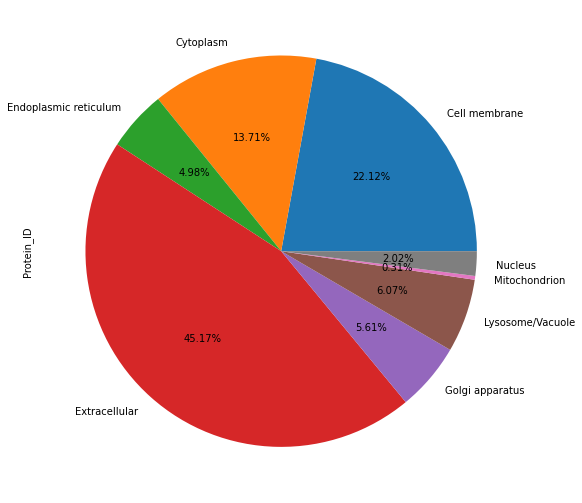

In [25]:
ax = g.plot.pie(y="Protein_ID", legend=False, autopct=lambda x: '{:.2f}%'.format(x), figsize=(9,9))